In [1]:
%matplotlib inline

In [2]:
cd Python_Scripts/

/Users/chowdahead/Python_Scripts


In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import patheffects
from datetime import datetime
from matplotlib.offsetbox import TextArea, VPacker, AnnotationBbox
import glob

from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

import geopandas as gp

import numpy as np

In [ ]:
import map_fig

In [ ]:
fig,ax = map_fig.create_map()
fig.savefig("uhhh.png")

In [1]:
cd /Users/chowdahead/wx-data

/Users/chowdahead/wx-data


https://www.spc.noaa.gov/products/fire_wx/day1firewx-shp.zip

In [13]:
today = datetime.utcnow()
today_date = f"{today:%Y_%m_%d}"
#! mkdir {today_date}/

In [ ]:
#cd {today_date}

In [32]:
day_num = 1

In [26]:
! curl -L https://www.spc.noaa.gov/products/fire_wx/day"$day_num"firewx-shp.zip > day"$day_num"firewx-shp.zip
! mkdir "$today_date"/day"$day_num"firewx-shp/
! tar xvzf day"$day_num"firewx-shp.zip -C day"$day_num"firewx-shp/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7981  100  7981    0     0   3904      0  0:00:02  0:00:02 --:--:--  3904
mkdir: day1firewx-shp/: File exists
x firewx_day1_dryltg.shp
x firewx_day1.shp
x firewx_day1_dryltg.shx
x firewx_day1.shx
x firewx_day1.dbf
x firewx_day1_dryltg.dbf
x firewx_day1_dryltg.prj
x firewx_day1.prj
x firewx_day1.info


In [30]:

path = f"/Users/chowdahead/wx-data/{today_date}/day1firewx-shp"
shp =  glob.glob(f"{path}/*.shp")
shp

['/Users/chowdahead/wx-data/2021_03_16/day1firewx-shp/firewx_day1.shp',
 '/Users/chowdahead/wx-data/2021_03_16/day1firewx-shp/firewx_day1_dryltg.shp']

In [31]:

shp = shp[0]
"""
 current_all.shp
x current_all.shx
x current_all.dbf
x current_all.cpg
x current_all.prj
"""
usa = gp.read_file(shp)
print("Shape of the dataframe: {}".format(usa.shape))
print("Projection of dataframe: {}".format(usa.crs))
#usa #last 5 records in dataframe
usa.head()

Shape of the dataframe: (2, 4)
Projection of dataframe: PROJCS["Lambert_Conformal_Conic",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",0],PARAMETER["standard_parallel_1",33],PARAMETER["standard_parallel_2",45],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


,DN,VALID,EXPIRE,geometry
0,8,202103161700,202103171200,"POLYGON ((-8058617.304 9313356.281, -8048770.4..."
1,5,202103161700,202103171200,"POLYGON ((-8014306.486 9352743.675, -8009383.0..."


In [ ]:
usa.crs

Please note that the FireWX outlook shapefiles contain DN attributes which are based on the NDFD grid values which are defined as:
5 - Elevated Risk
8 - Critical Risk
10 - Extreme Risk

Please note that the FireWX DryT outlook shapefiles contain DN attributes which are based on the NDFD grid values which are defined as:
5 - Isolated DryT Risk
8 - Scattered DryT Risk

In [5]:
elev = usa[usa.DN == 5]
elev

,DN,VALID,EXPIRE,geometry
1,5,202103101700,202103111200,"POLYGON ((-8127545.244 9544757.221, -8122621.8..."


In [6]:
crit = usa[usa.DN == 8]
crit

,DN,VALID,EXPIRE,geometry
0,8,202103101700,202103111200,"POLYGON ((-8063540.728 9337973.402, -8058617.3..."


In [8]:
extr = usa[usa.DN == 10]
extr

,DN,VALID,EXPIRE,geometry


In [ ]:
crs = usa.crs
crs

In [ ]:
globe = ccrs.Globe(ellipse='WGS84')
crs = ccrs.LambertConformal(globe=globe)

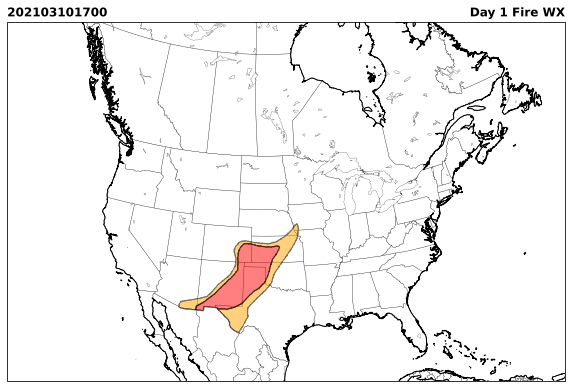

In [12]:

   
    # Set Projection of Plot
plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)
    
    # Lat/Lon Extents [lon0,lon1,lat0,lat1]
extent = [-130., -65, 20., 60.]
    
    
fig = plt.figure(figsize=(10., 8.))
    
    #add_metpy_logo(fig, 25, 950, size='small')
    
                                        # Add the Map 
    #---------------------------------------------------------------------------------------------------
ax = plt.subplot(111, projection=plotcrs)
    
    
    # Set extent and plot map lines
ax.set_extent(extent)
         
ax.coastlines(resolution='10m')
    
                                # Add State/Country Boundaries to Plot
    #---------------------------------------------------------------------------------------------------    
   
    #ax.add_feature(cfeature.BORDERS,edgecolor="k")
    #ax.add_feature(cfeature.LAND,facecolor="k",linewidth=0.2)
    #ax.add_feature(cfeature.OCEAN,facecolor="k",linewidth=0.2,edgecolor="k")
    #ax.add_feature(cfeature.LAKES,facecolor="k",linewidth=0.2,edgecolor="k",)
    
state_borders = cfeature.NaturalEarthFeature(
                    category='cultural', name='admin_1_states_provinces_lines',
                    scale='10m',facecolor='none')
ax.add_feature(state_borders, edgecolor='k', linewidth=0.35)
        
country_borders = cfeature.NaturalEarthFeature(category='cultural',
                    name='admin_0_countries',scale='10m', facecolor='none')
ax.add_feature(country_borders,edgecolor='k',linewidth=0.2)
    
    
lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        facecolor="w")
ax.add_feature(lakes,edgecolor='k',linewidth=0.2)
      
#ax.add_feature(cfeature.BORDERS,edgecolor="w")
ax.add_feature(cfeature.LAND,facecolor="w",linewidth=0.2)
ax.add_feature(cfeature.OCEAN,facecolor="w",linewidth=0.2,edgecolor="k")

#ax.add_feature(COUNTIES)
ax.add_geometries(elev["geometry"],crs=ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=0),
                  facecolor="orange",edgecolor="k",alpha=0.5)
ax.add_geometries(crit["geometry"],crs=ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=0),
                  facecolor="red",edgecolor="k",alpha=0.5)
#ax.add_geometries(high["geometry"],crs=ccrs.PlateCarree(),facecolor="r",edgecolor="k",alpha=0.5)

#ax.text(-129.5,20.3, "Slight (10-39%)", size=18,
#        color="b", bbox=dict(fc="none"),transform=ccrs.PlateCarree())

outline_effect = [patheffects.withStroke(linewidth=1.5, foreground='k')] 
texts = ['Elevated','Critical','Extreme']
colors = ['orange','red','#FF69B4']
Texts = []
   # Set the font 
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }
'''
for t,c in zip(texts,colors):
    Texts.append(TextArea(t,textprops=dict(color=c,fontsize=15,path_effects=outline_effect)))
    
texts_vbox = VPacker(children=Texts,pad=1,sep=5)
ann = AnnotationBbox(texts_vbox,(.012,0.1),xycoords=ax.transAxes,
                            box_alignment=(0,.5),bboxprops = 
                            dict(facecolor='w',boxstyle='round',edgecolor='k'))
ann.set_figure(fig)
fig.artists.append(ann)
'''
#prod = usa['PRODUCT'][0].replace("probability","prob.").replace("greater than",">").replace("inches","in.")

outline_effect2 = [patheffects.withStroke(linewidth=1.5, foreground='w')] 
ax.set_title("Day 1 Fire WX",loc='right',color='k', fontsize=12, weight='bold',
            path_effects=outline_effect2)

ax.set_title(usa["VALID"][0],loc='left',color='k', fontsize=12, weight='bold',
            path_effects=outline_effect2)

#prod_time = ax.text(0.99, 0.01,prod ,
#                            horizontalalignment='right', transform=ax.transAxes,
#                            color='white', fontsize=7, weight='bold')

#prod_time.set_path_effects(outline_effect)
    

fig.savefig(f"{2021_03_10}_day1_firewx.png",bbox_inches="tight",dpi=120)

In [ ]:
elev.plot()

In [27]:
cd ..

/Users/chowdahead/Downloads


In [28]:
gp.read_file("ActiveMD.kmz", driver="KMZ")

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,geometry


In [7]:
import fiona

In [10]:
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'rw',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'rw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r',
 'libkml': 'rw',
 'LIBKML': 'rw'}

In [9]:
fiona.drvsupport.supported_drivers['libkml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw' # enable KML support which is disabled by default

In [19]:
gp.read_file("mygeodata/ActiveMD_20210310.kml")

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,geometry


In [12]:
from zipfile import ZipFile

In [17]:
filename = 'mygeodata.zip'

kmz = ZipFile(filename, 'r')
kml = kmz.open('ActiveMD_20210310.kml', 'r')

In [18]:
kml.

<zipfile.ZipExtFile name='ActiveMD_20210310.kml' mode='r' compress_type=deflate>

In [20]:
cd mygeodata

/Users/chowdahead/Downloads/mygeodata


In [24]:
!ogr2ogr -f 'ESRI Shapefile' Output_sahpefile.shp ActiveMD.kmz

FAILURE:
Unable to open datasource `ActiveMD.kmz' with the following drivers.
  -> `PCIDSK'
  -> `netCDF'
  -> `PDS4'
  -> `VICAR'
  -> `JP2OpenJPEG'
  -> `PDF'
  -> `MBTiles'
  -> `EEDA'
  -> `ESRI Shapefile'
  -> `MapInfo File'
  -> `UK .NTF'
  -> `OGR_SDTS'
  -> `S57'
  -> `DGN'
  -> `OGR_VRT'
  -> `REC'
  -> `Memory'
  -> `BNA'
  -> `CSV'
  -> `NAS'
  -> `GML'
  -> `GPX'
  -> `LIBKML'
  -> `KML'
  -> `GeoJSON'
  -> `GeoJSONSeq'
  -> `ESRIJSON'
  -> `TopoJSON'
  -> `Interlis 1'
  -> `Interlis 2'
  -> `OGR_GMT'
  -> `GPKG'
  -> `SQLite'
  -> `OGR_DODS'
  -> `WAsP'
  -> `PostgreSQL'
  -> `OpenFileGDB'
  -> `XPlane'
  -> `DXF'
  -> `CAD'
  -> `FlatGeobuf'
  -> `Geoconcept'
  -> `GeoRSS'
  -> `GPSTrackMaker'
  -> `VFK'
  -> `PGDUMP'
  -> `OSM'
  -> `GPSBabel'
  -> `SUA'
  -> `OpenAir'
  -> `OGR_PDS'
  -> `WFS'
  -> `OAPIF'
  -> `HTF'
  -> `AeronavFAA'
  -> `EDIGEO'
  -> `SVG'
  -> `CouchDB'
  -> `Cloudant'
  -> `Idrisi'
  -> `ARCGEN'
  -> `SEGUKOOA'
  -> `SEGY'
  -> `XLS'
  -> `ODS'
  -

In [21]:
!ogr2ogr -f KML ActiveMD.kml input.shp

FAILURE:
Unable to open datasource `input.shp' with the following drivers.
  -> `PCIDSK'
  -> `netCDF'
  -> `PDS4'
  -> `VICAR'
  -> `JP2OpenJPEG'
  -> `PDF'
  -> `MBTiles'
  -> `EEDA'
  -> `ESRI Shapefile'
  -> `MapInfo File'
  -> `UK .NTF'
  -> `OGR_SDTS'
  -> `S57'
  -> `DGN'
  -> `OGR_VRT'
  -> `REC'
  -> `Memory'
  -> `BNA'
  -> `CSV'
  -> `NAS'
  -> `GML'
  -> `GPX'
  -> `LIBKML'
  -> `KML'
  -> `GeoJSON'
  -> `GeoJSONSeq'
  -> `ESRIJSON'
  -> `TopoJSON'
  -> `Interlis 1'
  -> `Interlis 2'
  -> `OGR_GMT'
  -> `GPKG'
  -> `SQLite'
  -> `OGR_DODS'
  -> `WAsP'
  -> `PostgreSQL'
  -> `OpenFileGDB'
  -> `XPlane'
  -> `DXF'
  -> `CAD'
  -> `FlatGeobuf'
  -> `Geoconcept'
  -> `GeoRSS'
  -> `GPSTrackMaker'
  -> `VFK'
  -> `PGDUMP'
  -> `OSM'
  -> `GPSBabel'
  -> `SUA'
  -> `OpenAir'
  -> `OGR_PDS'
  -> `WFS'
  -> `OAPIF'
  -> `HTF'
  -> `AeronavFAA'
  -> `EDIGEO'
  -> `SVG'
  -> `CouchDB'
  -> `Cloudant'
  -> `Idrisi'
  -> `ARCGEN'
  -> `SEGUKOOA'
  -> `SEGY'
  -> `XLS'
  -> `ODS'
  -> `